In [1]:
import matplotlib.pyplot as plt

[{'epoch': 0.0005, 'grad_norm': 0.9175367951393127, 'learning_rate': 6.000000000000001e-07, 'loss': 1.0232, 'step': 10}, {'epoch': 0.001, 'grad_norm': 0.9400426149368286, 'learning_rate': 1.2000000000000002e-06, 'loss': 1.0349, 'step': 20}, {'epoch': 0.0015, 'grad_norm': 0.9204498529434204, 'learning_rate': 1.8e-06, 'loss': 1.028, 'step': 30}, {'epoch': 0.002, 'grad_norm': 0.9648035168647766, 'learning_rate': 2.4000000000000003e-06, 'loss': 1.024, 'step': 40}, {'step': 50, 'wer/bud500': 0.25013886046715583}, {'step': 50, 'wer/private': 0.35294117647058826}, {'epoch': 0.0025, 'grad_norm': 0.9472363591194153, 'learning_rate': 3e-06, 'loss': 1.0175, 'step': 50}, {'epoch': 0.003, 'grad_norm': 0.9715927243232727, 'learning_rate': 3.6e-06, 'loss': 1.0337, 'step': 60}, {'epoch': 0.0035, 'grad_norm': 0.9721350073814392, 'learning_rate': 4.2000000000000004e-06, 'loss': 1.0257, 'step': 70}, {'epoch': 0.004, 'grad_norm': 0.916278064250946, 'learning_rate': 4.800000000000001e-06, 'loss': 1.0028, '

Text(0, 0.5, 'loss')

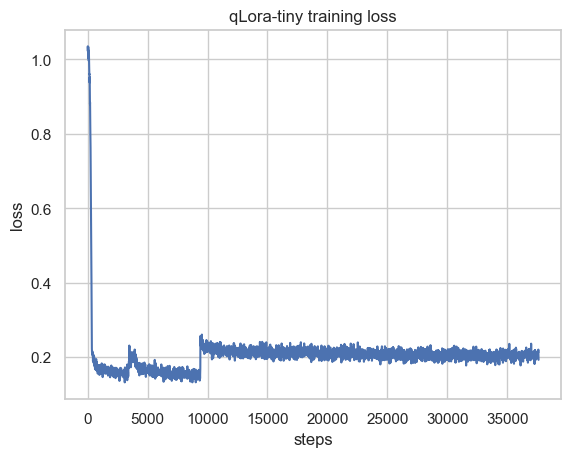

In [2]:
import matplotlib.pyplot as plt
import json
import seaborn as sns
model_type = "tiny"
with open(f"../assets/trainer_state_qLora_{model_type}.json") as f:
    data = json.load(f)
    
metrics = {
    'step': [],
    'loss': [],
    'wer_private': [],
    'wer_bud500': [],
    'eval_loss': []
}
print(data['log_history'])
x = []
y = []

tag = "loss"
for entry in data['log_history']:
    if 'step' in entry:
        if tag in entry:
            y.append(entry[tag])
            x.append(entry['step'])
# plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(x=x, y=y, )
plt.title(f"qLora-{model_type} training loss", fontsize=12)
# plt.plot(metrics['step'], [x*10 if x is not None else None for x in metrics['wer_private']], 
#          label='WER/private (×10)', color='green', alpha=0.7)
plt.xlabel("steps")
plt.ylabel("loss")

# plt.savefig(f"../assets/qLora-{model_type}_eval_loss.png")
# plt.plot(metrics['step'], [x*10 if x is not None else None for x in metrics['wer_bud500']], 
#          label='WER/bud500 (×10)', color='red', alpha=0.7)

# plt.plot(metrics['step'], metrics['eval_loss'], label='Evaluation Loss', color='purple', alpha=0.7)

# plt.xlabel('Training Step')
# plt.ylabel('Metric Value')
# plt.title('Training Metrics Over Steps')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', alpha=0.5)

# eval_steps = [step for step, eval_loss in zip(metrics['step'], metrics['eval_loss']) if eval_loss is not None]
# for step in eval_steps:
#     plt.axvline(x=step, color='gray', linestyle=':', alpha=0.3)

# plt.tight_layout()
# plt.show()
# metrics['step']

In [35]:
y[7]

0.252262443438914

In [34]:
np.argmin(y) - 1

np.int64(7)

In [36]:
import numpy as np
x[7]

400

In [25]:
np.argmin(y)

np.int64(70)

In [ ]:
y[260]

In [ ]:
import matplotlib.pyplot as plt
import json
from collections import defaultdict
import seaborn as sns

with open("../assets/trainer_state_qLora_base.json") as f:
    data = json.load(f)
    
metrics = {
    'step': [],
    'loss': [],
    'wer_private': [],
    'wer_bud500': [],
    'eval_loss': []
}
print(data['log_history'])
x = []
y = []

for entry in data['log_history']:
    if 'step' in entry:
        if 'wer/private' in entry:
            y.append(entry['wer/private'])
            x.append(entry['step'])

# plt.figure(figsize=(12, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(x=x, y=y, )
plt.title("qLora-base private WER (lowest=0.25)", fontsize=12)
# plt.plot(metrics['step'], [x*10 if x is not None else None for x in metrics['wer_private']], 
#          label='WER/private (×10)', color='green', alpha=0.7)
plt.xlabel("steps")
plt.ylabel("wer")

plt.savefig("../assets/qLora-base_private_WER.png")
# plt.plot(metrics['step'], [x*10 if x is not None else None for x in metrics['wer_bud500']], 
#          label='WER/bud500 (×10)', color='red', alpha=0.7)

# plt.plot(metrics['step'], metrics['eval_loss'], label='Evaluation Loss', color='purple', alpha=0.7)

# plt.xlabel('Training Step')
# plt.ylabel('Metric Value')
# plt.title('Training Metrics Over Steps')
# plt.legend()
# plt.grid(True, which='both', linestyle='--', alpha=0.5)

# eval_steps = [step for step, eval_loss in zip(metrics['step'], metrics['eval_loss']) if eval_loss is not None]
# for step in eval_steps:
#     plt.axvline(x=step, color='gray', linestyle=':', alpha=0.3)

# plt.tight_layout()
# plt.show()
# metrics['step']

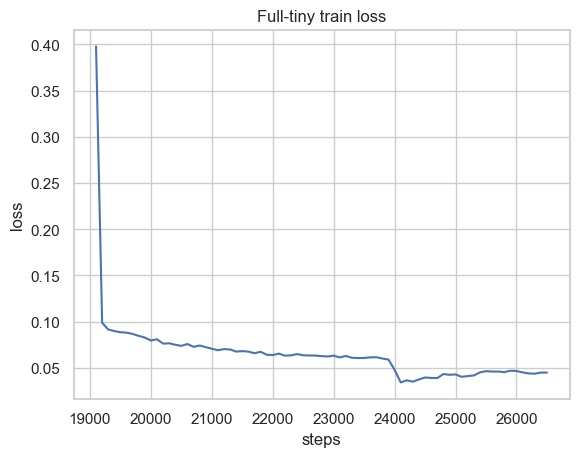

In [3]:
import json
import seaborn as sns
with open("../assets/full-tiny-train-loss.json") as f:
    data = json.load(f)

x = list(map(lambda x: x[1] + 19000, data))
y = list(map(lambda x: x[2], data))

sns.set_theme(style="whitegrid")
sns.lineplot(x=x, y=y, )
plt.title("Full-tiny train loss", fontsize=12)
# plt.plot(metrics['step'], [x*10 if x is not None else None for x in metrics['wer_private']], 
#          label='WER/private (×10)', color='green', alpha=0.7)
plt.xlabel("steps")
plt.ylabel("loss")

plt.savefig("../assets/images/full-tiny-train-loss.png")

In [ ]:
min(y)

In [2]:
data_point = (
    ["fw-tiny", (19.83, 0.221)],
    ["fw-base", (33.59, 0.243)],
    ["cpp-ti-q8", (21.27, 0.23)],
    ["cpp-ti-q41", (18.29, 0.269)],
    ["cpp-ti-q51", (24.78, 0.261)],
    ["cpp-ba-q8", (48.49, 0.255)],
    ["cpp-ba-q2k", (43.54, 0.31)],
)

basic_base = 0.253
basic_tiny = 0.217

In [ ]:
labels, points = zip(*data_point)

In [ ]:
x, y = zip(*points)

In [ ]:
import numpy as np
np.random.seed(42)
colors = np.random.rand(7)
sns.scatterplot(
    x=x,
    y=y,
    palette='viridis',
    hue=colors,
    legend=False
)
for i in range(len(x)):
    plt.text(x[i], y[i] + 0.003, f'{labels[i]}', fontsize=9, ha='right')

plt.axhline(
    y=basic_base, label="base", linestyle='--'
)
plt.text(50, basic_base - 0.005, 'basis-base', fontsize=12, ha='center')
plt.axhline(
    y=basic_tiny, label="tiny", linestyle='--', color="orange"
)
plt.text(50, basic_tiny + 0.005, 'basis-tiny', color='orange', fontsize=12, ha='center')
plt.ylim(0.2, 0.32)

plt.title("Latency and WER Tradeoff in Quantization")
plt.xlabel("processing time (s)")
plt.ylabel("wer (%)")

plt.savefig("../assets/images/wer-latency-trade-off.png")


In [ ]:
min(y)

In [ ]:
import httpx
import git
from transformers import WhisperForConditionalGeneration
from peft import LoraConfig, get_peft_model

model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

"../../models/hubs/pho-whisper-tiny/"
config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=["q_proj", "v_proj"],
    lora_dropout=0.05,
    bias="none"
)
model = get_peft_model(model, config)

model.save_pretrained("whisper-lora")

model = model.merge_and_unload()

model.save_pretrained("whisper-merged")

from faster_whisper.utils import convert_hf_whisper
convert_hf_whisper(
    hf_model_name_or_path="whisper-merged",
    output_dir="whisper-merged-ct2",
    quantization="float16"  # or "int8"
)

from faster_whisper import WhisperModel
model = WhisperModel("whisper-merged-ct2", device="cuda")
segments, _ = model.transcribe("audio.mp3")


from transformers import WhisperFeatureExtractor, WhisperTokenizer, WhisperProcessor, AutoModelForCausalLM
from peft import PeftModel, PeftConfig
from transformers import WhisperForConditionalGeneration
import os
# from transformers. import AdapterConfig, AdapterType

language = "vi"
task="transcribe"
model_repo = "vinai/PhoWhisper-tiny"

processor = WhisperProcessor.from_pretrained(model_repo, language=language, task=task)
feature_extractor = WhisperFeatureExtractor.from_pretrained(model_repo)
tokenizer = WhisperTokenizer.from_pretrained(model_repo, language=language, task=task)
model = WhisperForConditionalGeneration.from_pretrained(model_repo)
peft_model_id = "PEFT_qLoRa_Whisper_tiny/checkpoint-3600/adapter_model"

peft_config = PeftConfig.from_pretrained(peft_model_id, inference_mode=True)

model = PeftModel.from_pretrained(model, peft_model_id)

In [1]:
from faster_whisper import WhisperModel
model = WhisperModel(
    "../../models/hubs/pho-whisper-tiny",
    compute_type="int8",
)

c:\Users\skt1t\OneDrive\Máy tính\New folder\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
segments, _ = model.transcribe("./test1.wav")
for segment in segments:
    print(f"[{segment.start:.2f}s -> {segment.end:.2f}s] {segment.text}")

: 